KEY INSIGHTS

- The algebraic sigmoid naturally produces Budget_ROAS < Budget_π. **Conjecture** this occurs for any revenue functino with diminishing returns
- Budget_π depends on margin: lower margin → higher Budget_π

In [20]:
import sympy as sp
import numpy as np
from sympy import init_printing, pprint
import matplotlib.pyplot as plt
from IPython.display import display, Math
import warnings
from scipy.optimize import fsolve

warnings.filterwarnings('ignore')
init_printing(use_latex=True)

GENERAL ANALYSIS


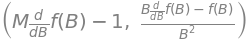

In [21]:
# Define symbols
B = sp.symbols('B', positive=True, real=True)
C = sp.symbols('C', positive=True, real=True)
M = sp.symbols('M', positive=True, real=True)

# Define f as a generic function of B
f = sp.Function('f')

print("=" * 60)
print("GENERAL ANALYSIS")
print("=" * 60)

# Define the functions
revenue_net = f(B) - B
profit = M * f(B) - B
ROAS = f(B) / B
sp.diff(profit, B), sp.simplify(sp.diff(ROAS, B))

## Model

In [22]:
# Parameters
K = 1000  # Maximum revenue
a = 50    # Half-saturation point (where f(B) = K/2)
margin = 1/3  # Margin

# Create B range
B_range = np.linspace(0, 200, 1000)

# Define the functions
def f(B, K=K, a=a):
    """Algebraic sigmoid: f(B) = K * B² / (a² + B²)"""
    return K * B**2 / (a**2 + B**2)

def net_revenue(B, K=K, a=a):
    """Net revenue: f(B) - B"""
    return f(B, K, a) - B

def profit(B, K=K, a=a, margin=margin):
    """Profit: margin * f(B) - B"""
    return margin * f(B, K, a) - B

# Calculate function values
f_values = f(B_range)
net_rev_values = net_revenue(B_range)
profit_values = profit(B_range)

# Find critical points
def f_prime(B, K=K, a=a):
    """Derivative of f(B)"""
    return 2 * K * a**2 * B / (a**2 + B**2)**2

def net_rev_prime(B, K=K, a=a):
    """Derivative of net revenue"""
    return f_prime(B, K, a) - 1

def profit_prime(B, K=K, a=a, margin=margin):
    """Derivative of profit"""
    return margin * f_prime(B, K, a) - 1

# Find optimal points
# For net revenue: f'(B) = 1
try:
    B_net_opt = fsolve(net_rev_prime, 100)[0]
    if B_net_opt > 0:
        net_rev_opt = net_revenue(B_net_opt)
    else:
        B_net_opt = None
except:
    B_net_opt = None

# For profit: margin * f'(B) = 1, or f'(B) = 1/margin = 3
try:
    B_profit_opt = fsolve(profit_prime, 100)[0]
    if B_profit_opt > 0:
        profit_opt = profit(B_profit_opt)
    else:
        B_profit_opt = None
except:
    B_profit_opt = None

# For R = f(B)/B maximization
def R(B, K=K, a=a):
    """Average revenue: f(B) / B"""
    if B == 0:
        return 0
    return K * B / (a**2 + B**2)

def R_prime(B, K=K, a=a):
    """Derivative of R"""
    return K * a**2 / (a**2 + B**2)**2

# R is maximized at B = a (can be shown analytically)
B_R_opt = a
R_opt = R(B_R_opt)


## Plotting

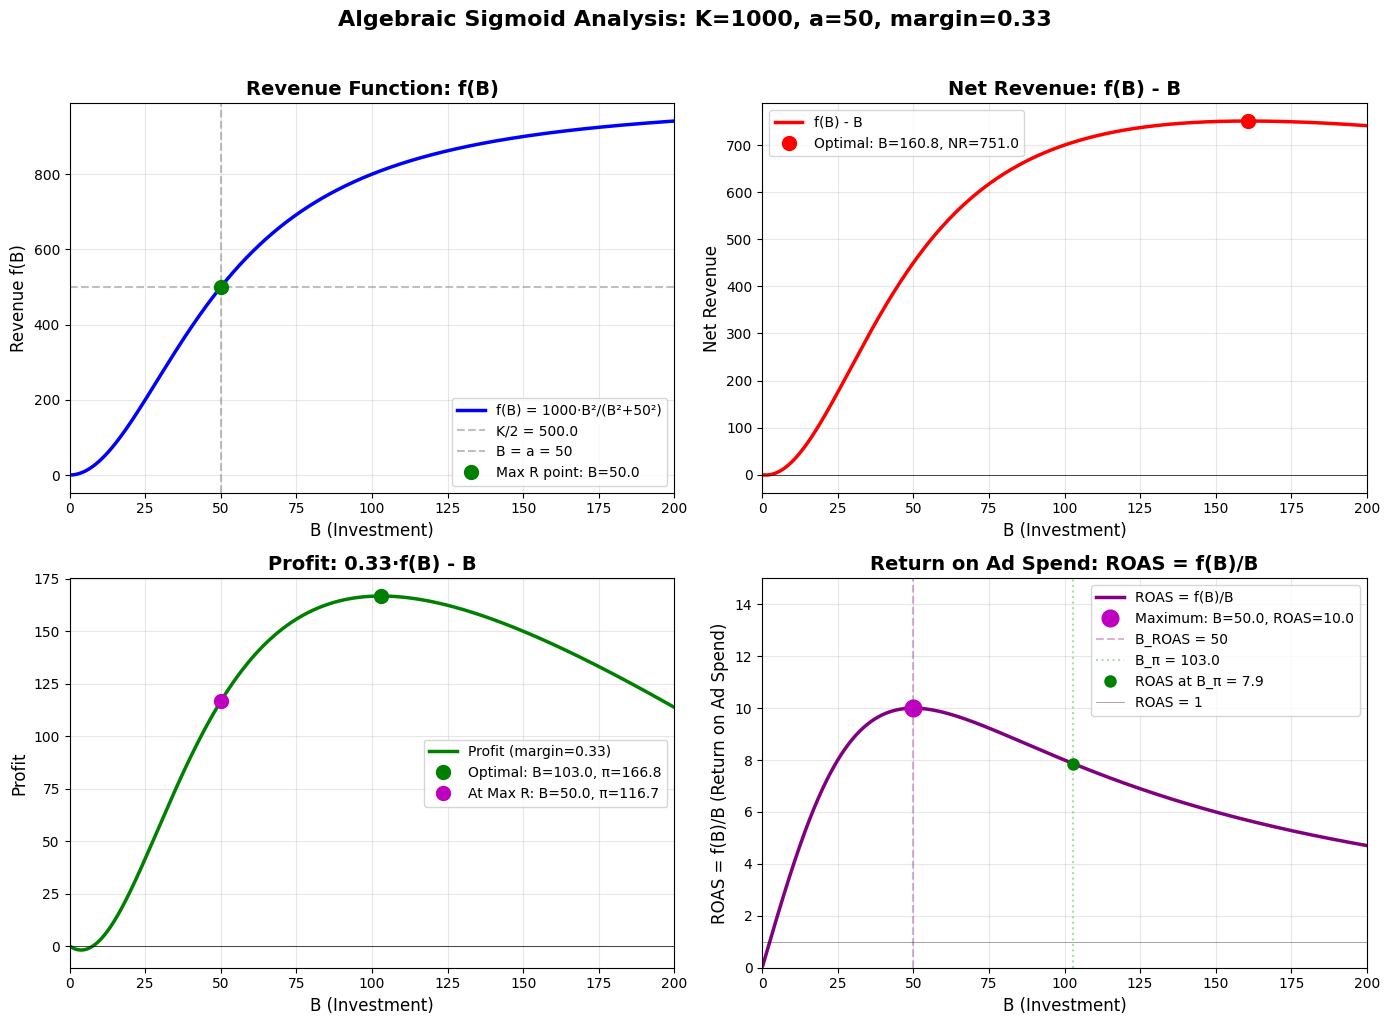

In [24]:

# Create the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: f(B) - Revenue function
ax1 = axes[0, 0]
ax1.plot(B_range, f_values, 'b-', linewidth=2.5, label=f'f(B) = {K}·B²/(B²+{a}²)')
ax1.axhline(y=K/2, color='gray', linestyle='--', alpha=0.5, label=f'K/2 = {K/2}')
ax1.axvline(x=a, color='gray', linestyle='--', alpha=0.5, label=f'B = a = {a}')
ax1.plot(B_R_opt, f(B_R_opt), 'go', markersize=10, label=f'Max R point: B={B_R_opt:.1f}')
ax1.set_xlabel('B (Investment)', fontsize=12)
ax1.set_ylabel('Revenue f(B)', fontsize=12)
ax1.set_title('Revenue Function: f(B)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim([0, 200])

# Plot 2: f(B) - B - Net Revenue
ax2 = axes[0, 1]
ax2.plot(B_range, net_rev_values, 'r-', linewidth=2.5, label='f(B) - B')
ax2.axhline(y=0, color='black', linewidth=0.5)
if B_net_opt:
    ax2.plot(B_net_opt, net_rev_opt, 'ro', markersize=10, 
             label=f'Optimal: B={B_net_opt:.1f}, NR={net_rev_opt:.1f}')
ax2.set_xlabel('B (Investment)', fontsize=12)
ax2.set_ylabel('Net Revenue', fontsize=12)
ax2.set_title('Net Revenue: f(B) - B', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim([0, 200])

# Plot 3: margin * f(B) - B - Profit
ax3 = axes[1, 0]
ax3.plot(B_range, profit_values, 'g-', linewidth=2.5, label=f'Profit (margin={margin:.2f})')
ax3.axhline(y=0, color='black', linewidth=0.5)
if B_profit_opt:
    ax3.plot(B_profit_opt, profit_opt, 'go', markersize=10, 
             label=f'Optimal: B={B_profit_opt:.1f}, π={profit_opt:.1f}')
ax3.plot(B_R_opt, profit(B_R_opt), 'mo', markersize=10, 
         label=f'At Max R: B={B_R_opt:.1f}, π={profit(B_R_opt):.1f}')
ax3.set_xlabel('B (Investment)', fontsize=12)
ax3.set_ylabel('Profit', fontsize=12)
ax3.set_title(f'Profit: {margin:.2f}·f(B) - B', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_xlim([0, 200])

# Plot 4: ROAS = f(B)/B - Return on Ad Spend
ax4 = axes[1, 1]
ROAS_values = np.zeros_like(B_range)
for i, B in enumerate(B_range):
    if B > 0:
        ROAS_values[i] = f(B) / B
    else:
        ROAS_values[i] = 0

ax4.plot(B_range[B_range > 0], ROAS_values[B_range > 0], 'purple', linewidth=2.5, label='ROAS = f(B)/B')
ax4.plot(B_R_opt, R_opt, 'mo', markersize=12, label=f'Maximum: B={B_R_opt:.1f}, ROAS={R_opt:.1f}')

# Add reference lines
ax4.axvline(x=B_R_opt, color='purple', linestyle='--', alpha=0.3, label=f'B_ROAS = {B_R_opt}')
if B_profit_opt:
    ax4.axvline(x=B_profit_opt, color='green', linestyle=':', alpha=0.3, label=f'B_π = {B_profit_opt:.1f}')
    ROAS_at_profit = f(B_profit_opt) / B_profit_opt
    ax4.plot(B_profit_opt, ROAS_at_profit, 'go', markersize=8, label=f'ROAS at B_π = {ROAS_at_profit:.1f}')

# Add horizontal line at ROAS = 1 (break-even)
ax4.axhline(y=1, color='black', linewidth=0.5, linestyle='-', alpha=0.5, label='ROAS = 1')

ax4.set_xlabel('B (Investment)', fontsize=12)
ax4.set_ylabel('ROAS = f(B)/B (Return on Ad Spend)', fontsize=12)
ax4.set_title('Return on Ad Spend: ROAS = f(B)/B', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(loc='best')
ax4.set_xlim([0, 200])
ax4.set_ylim([0, max(R_opt * 1.2, 15)])

plt.suptitle(f'Algebraic Sigmoid Analysis: K={K}, a={a}, margin={margin:.2f}', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [25]:

# Print analysis
print("=" * 70)
print("ALGEBRAIC SIGMOID ANALYSIS")
print("=" * 70)
print(f"\nFunction: f(B) = {K} · B² / ({a}² + B²)")
print(f"Parameters: K = {K} (max revenue), a = {a} (half-saturation), margin = {margin:.3f}")

print("\n" + "=" * 70)
print("CRITICAL POINTS")
print("=" * 70)

print(f"\n1. ROAS = f(B)/B Maximization:")
print(f"   B_ROAS = {B_R_opt:.1f}")
print(f"   Max ROAS = {R_opt:.3f}")
print(f"   f(B_ROAS) = {f(B_R_opt):.1f}")
print(f"   f'(B_ROAS) = {f_prime(B_R_opt):.3f}")

if B_net_opt:
    print(f"\n2. Net Revenue f(B) - B Maximization:")
    print(f"   B_net = {B_net_opt:.1f}")
    print(f"   Max Net Revenue = {net_rev_opt:.1f}")
    print(f"   f'(B_net) = 1 (by FOC)")

if B_profit_opt:
    print(f"\n3. Profit margin·f(B) - B Maximization:")
    print(f"   B_π = {B_profit_opt:.1f}")
    print(f"   Max Profit = {profit_opt:.1f}")
    print(f"   f'(B_π) = {f_prime(B_profit_opt):.3f} = 1/margin = {1/margin:.3f}")

print("\n" + "=" * 70)
print("COMPARISON: B_ROAS vs B_π")
print("=" * 70)

if B_profit_opt and B_R_opt:
    print(f"\nB_ROAS = {B_R_opt:.1f} < B_π = {B_profit_opt:.1f}: {B_R_opt < B_profit_opt}")
    print(f"\nThis confirms that for the algebraic sigmoid:")
    print(f"- Maximum ROAS occurs at B = a = {a}")
    print(f"- Maximum profit occurs at B = {B_profit_opt:.1f}")
    print(f"- Since margin = {margin:.3f} < 1, we have B_ROAS < B_π")
    
    print(f"\nEconomic interpretation:")
    print(f"- At B_ROAS = {B_R_opt}: Peak ROAS = {R_opt:.3f}")
    print(f"- At B_π = {B_profit_opt:.1f}: ROAS = {f(B_profit_opt)/B_profit_opt:.3f} (lower but still profitable)")
    print(f"- The firm expands beyond peak ROAS to maximize total profit")



ALGEBRAIC SIGMOID ANALYSIS

Function: f(B) = 1000 · B² / (50² + B²)
Parameters: K = 1000 (max revenue), a = 50 (half-saturation), margin = 0.333

CRITICAL POINTS

1. ROAS = f(B)/B Maximization:
   B_ROAS = 50.0
   Max ROAS = 10.000
   f(B_ROAS) = 500.0
   f'(B_ROAS) = 10.000

2. Net Revenue f(B) - B Maximization:
   B_net = 160.8
   Max Net Revenue = 751.0
   f'(B_net) = 1 (by FOC)

3. Profit margin·f(B) - B Maximization:
   B_π = 103.0
   Max Profit = 166.8
   f'(B_π) = 3.000 = 1/margin = 3.000

COMPARISON: B_ROAS vs B_π

B_ROAS = 50.0 < B_π = 103.0: True

This confirms that for the algebraic sigmoid:
- Maximum ROAS occurs at B = a = 50
- Maximum profit occurs at B = 103.0
- Since margin = 0.333 < 1, we have B_ROAS < B_π

Economic interpretation:
- At B_ROAS = 50: Peak ROAS = 10.000
- At B_π = 103.0: ROAS = 7.859 (lower but still profitable)
- The firm expands beyond peak ROAS to maximize total profit
